In [1]:
from glob import glob
import os as os
import json
import matplotlib.pyplot as plt  
import matplotlib as mpl  
import autograd.numpy as np
from autograd import grad
import pandas as pd
import scipy as scipy
import time

np.random.seed(123)
%matplotlib inline

import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV

import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
directories = [name for name in os.listdir("/home/a0121533/fyp2017dsap/slides/") if os.path.isdir(os.path.join("/home/a0121533/fyp2017dsap/slides/", name))]
slide_files = []

for d in directories:
    slide_path = "/home/a0121533/fyp2017dsap/slides/" + d + "/" 
    list_of_slides = glob(slide_path + "*.svs")
    
    if len(list_of_slides) != 0:
        slide_file_name = glob(slide_path + "*.svs")[0] # one slide in each directory
        slide_files.append(slide_file_name)

In [3]:
def generate_data(data_type):
    read_tiles_path = "/home/a0121533/fyp2017dsap/tiles/" + data_type + "/"
    tiles = glob(read_tiles_path + "*.png")    
    
    img_matrix_array = []
    
    for tile in tiles:
        # read slide name from tile [slide_name]_[slide_index].png score value
        slide_name = tile[tile.rfind('/')+1:tile.rfind('/')+17]
        
        tile_data = mpimg.imread(tile)
        img_matrix_array.append(tile_data)
    
    return np.asarray(img_matrix_array)

In [39]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=3)

In [11]:
print("Obtaining tile and labels")
# generate tile and labels
x_train = generate_data("train")
print(x_train.shape)


x_train = x_train[0:6,]
print(x_train.shape)

Obtaining tile and labels
(2282, 256, 256, 3)
(6, 256, 256, 3)


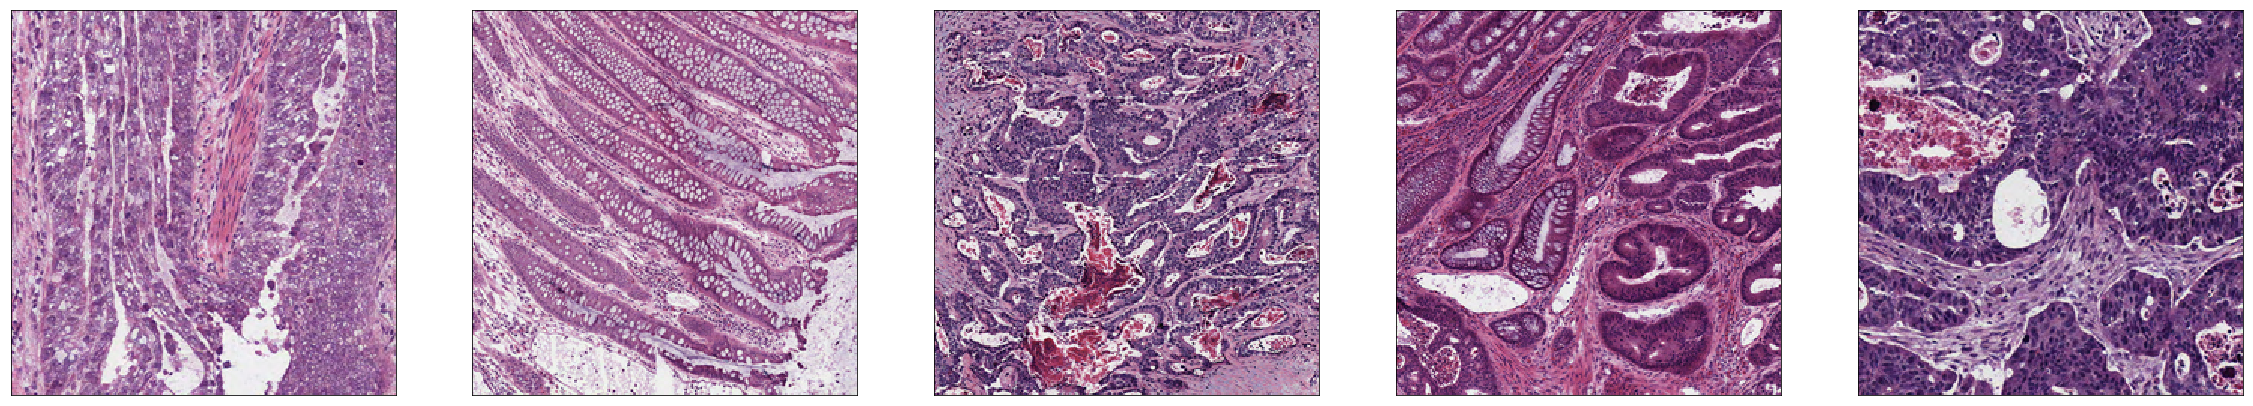

In [37]:
plt.figure(figsize=(40, 20))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
a = x_train_distort.copy()
a[0],a[1],a[2],a[3],a[4] = x_train_distort[2],x_train_distort[1],x_train_distort[4],x_train_distort[0],x_train_distort[3]

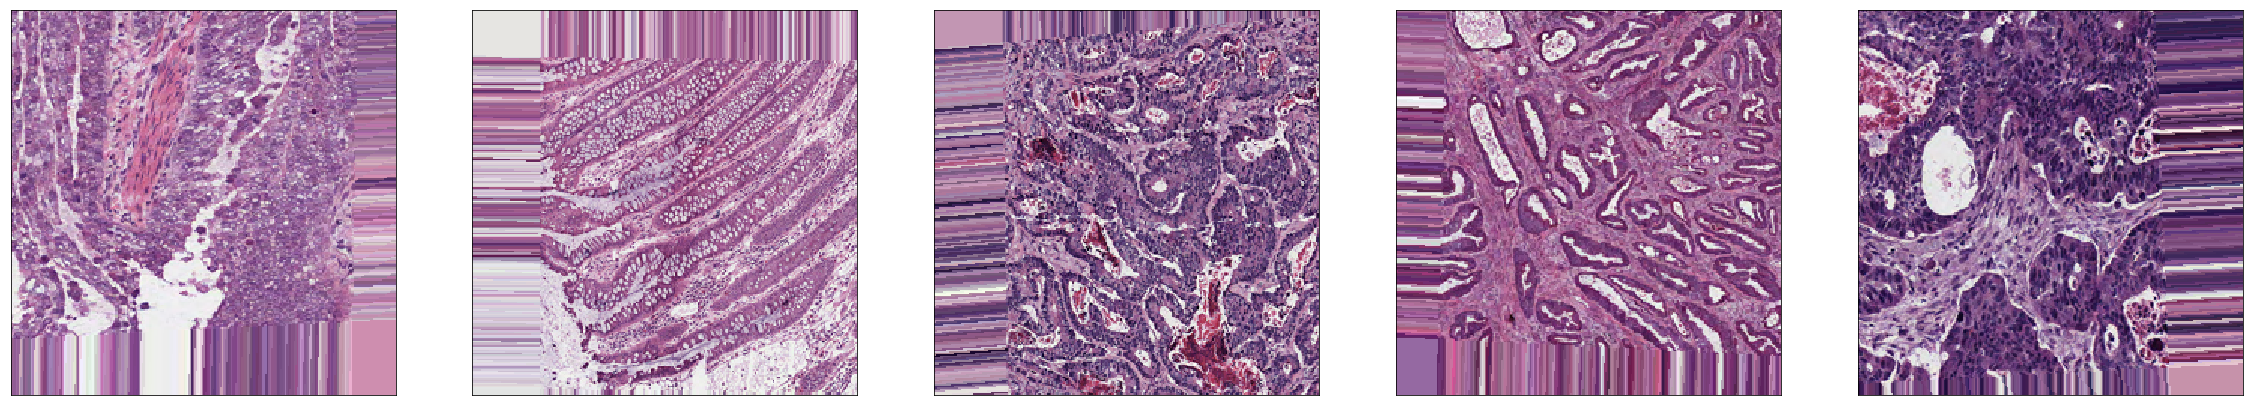

In [42]:
plt.figure(figsize=(40, 20))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(a[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()